In this post, we are going to solve a circuit diagram problem using Python and a package called **SchemDraw**.  **SchemDraw** is a specialized Python package for drawing circuit diagrams. For **SchemDraw** documentation see:

[https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html](https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html)

### **Given:**

The circuit diagram below with a driving voltage $V_t = 5.20 V$ and resistor values in the table below.

![7_resistors_3_loops.png]({filename}/posts/schemdraw/7_resistors_3_loops.png)


A table of resistance values is below:

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>1</sub> =| 13.2 m&Omega; |
| R<sub>2</sub> =| 21.0 m&Omega; |
| R<sub>3</sub> =| 3.60 m&Omega; |
| R<sub>4</sub> =| 15.2 m&Omega; |
| R<sub>5</sub> =| 11.9 m&Omega; |
| R<sub>6</sub> =| 2.20 m&Omega; |
| R<sub>7</sub> =| 7.40 m&Omega; |

### **Find:** 

V<sub>6</sub> and V<sub>7</sub>, the voltage drop across resistors R<sub>6</sub> and R<sub>7</sub>

I<sub>3</sub> and I<sub>6</sub>, the current running through resistors R<sub>3</sub> and R<sub>6</sub>

P<sub>4</sub> and P<sub>7</sub>, the power dissipated by resistors R<sub>4</sub> and R<sub>7</sub>

### **Solution:**

First we'll import the necessary packages. I'm using a jupyter notebook, so the ```%matplotlib inline``` command is included. If you want high-resolution circuit diagrams, include the line:

```
%config InlineBackend.figure_format = 'svg'
```

at the top of the notebook will ensure high-resolution images.


In [1]:
import matplotlib.pyplot as plt
# if using a jupyter notebook: include %matplotlib inline. If constructing a .py-file: comment out
%matplotlib inline
# if high-resolution images are desired: include %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

Now we'll build the circuit diagram by creating a SchemDraw ```Drawing``` object and adding elements to it.

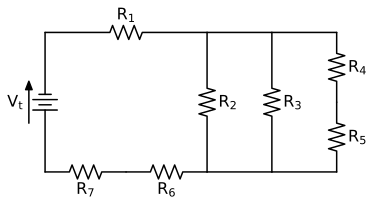

In [2]:
d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('7_resistors_3_loops.png')
#d.save('7_resistors_3_loops.pdf')


### Find R<sub>t</sub>

Now we'll find the total resistance of the circuit R<sub>t</sub> using the individual resistances. First, define the resistances and driving voltage as variables.

In [3]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

### Find R<sub>45</sub> and R<sub>67</sub>

To simplify the circuit diagram, we'll combine the resistors in series.

For resistors in a simple series circuit:

$$ R_t = R_1 + R_2 + R_3 ... + R_n $$

Since resistors $R_4$ and $R_5$ are in simple series:

$$ R_{45} = R_4 + R_5 $$

Since resistors $R_6$ and $R_7$ are in simple series:

$$ R_{67} = R_6 + R_7 $$

We can easily calculate this with Python. After the calculation, we can use an ```fstring``` to print the results. Note the ```round()``` function is used on the inside of the fstring curly braces ```{ }```, in case there are some floating point math errors that lead to the values printing out as long floats.

In [4]:
R45 = R4 + R5
R67 = R6 + R7

print(f'R45 = {round(R45,7)} Ohm, R67 = {round(R67,5)} Ohm')

R45 = 0.0271 Ohm, R67 = 0.0096 Ohm


Let's redraw our circuit diagram to show the combined resistors.

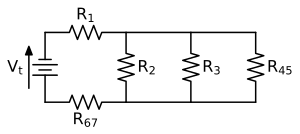

In [5]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R45 = d.add(e.RES, d='up', botlabel='$R_{45}$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('5_resistors_3_loops.png')
#d.save('5_resistors_3_loops.pdf')

### Find R<sub>2345</sub>

Next we can combine the resistors in parallel. The resistors in parallel are $R_2$, $R_3$ and $R_{45}$. For a resistors in a simple parallel circuit:

$$ \frac{1}{R_t} = \frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} ... + \frac{1}{R_n} $$

Since $R_2$, $R_3$ and $R_{45}$ are in parallel:

$$ \frac{1}{R_{2345}} = \frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}} $$

$$ R_{2345} = \frac{1}{\frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}}} $$

We can code this calculation in Python. To find the reciprocal, raise the combined sum to the negative one power. Remember, exponentiation is performed with a double asterisk ```**``` in Python.

In [6]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
print(f'R2345 = {round(R2345,7)} Ohm')

R2345 = 0.0027602 Ohm


OK, now let's construct a new **SchemDraw** diagram of the simplified the circuit. In this diagram, we'll combine $R_2$, $R_3$ and $R_{45}$ into one big resistor, $R_{2345}$.

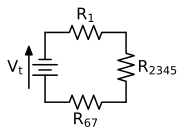

In [7]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
R345 = d.add(e.RES, d='up' , botlabel='$R_{2345}$')
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('3_resistors_1_loop.png')
#d.save('3_resistors_1_loop.pdf')

### Find R<sub>t</sub>

To find $R_t$, we again combine the resistors in series. The remaining resistors $R_1$, $R_{2345}$ and $R_{67}$ are in series:

$$ R_{1234567} = R_1 + R_{2345} + R_{67} $$

We'll call the total resistance of the circuit $R_t$ which is equal to  $R_{1234567}$

$$ R_t = R_{1234567} $$

Another calculation in Python.

In [8]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)

Rt = R1 + R2345 + R67
print(f'Rt = {round(Rt,7)} Ohm')

Rt = 0.0255602 Ohm


Last circuit diagram. The simplest one. This **SchemDraw** diagram just includes $V_t$ and $R_t$.

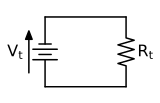

In [9]:
d = schem.Drawing(unit=2.5)
L2 = d.add(e.LINE, d='right')
Rt = d.add(e.RES, d='up' , botlabel='$R_{t}$')
L1 = d.add(e.LINE, d='left', tox=L2.start)
Vt = d.add(e.BATTERY, d='up', xy=L2.start, toy=L1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('1_resistor_no_loops.png')
#d.save('1_resistor_no_loops.pdf')

### Find V<sub>6</sub> and V<sub>7</sub>

Now that we've solved for the total resistance of the circuit $R_t$, we can find the total current running through the circuit using Ohm's Law $V = IR $.

$$ V = IR $$

$$ I = \frac{V}{R} $$

$$ I_t = \frac{V_t}{R_t} $$

In [10]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
Rt = R1 + R2345 + R67

It = Vt/Rt
print(f'It = {round(It,2)} A')

It = 203.44 A


The total current of the circuit, $I_t$ is the same as the current running through resistor $R_6$ and resistor $R_7$.

$$ I_t = I_6 = I_7 $$

We can apply Ohm's law to find $V_6$ now that we have $I_6$ and $I_7$. 

$$ V_6 = I_6 R_6 $$
$$ V_7 = I_7 R_7 $$


In [11]:
I6 = It
I7 = It
V6 = I6 * R6
V7 = I7 * R7
print(f'V6 = {round(V6,5)} V, V7 = {round(V7,5)} V')

V6 = 0.44757 V, V7 = 1.50547 V


### Find I<sub>3</sub> and I<sub>6</sub>

The total current of the circuit, $I_t$ is the same as the current running through resistor $R_{2345}$.

$$ I_t = I_{2345} $$

We can apply Ohm's law to find $V_{2345}$ now that we have $I_{2345}$. 

$$ V_{2345} = I_{2345} R_{2345} $$



In [12]:
I2345 = It
V2345 = I2345 * R2345
print(f'V2345 = {round(V2345,5)} V')

V2345 = 0.56153 V


The voltage drop across resistor $R_3$ is the same as the voltage drop across resistor $R_{2345}$.

$$ V_3 = V_{2345} $$

Since $V_3$ and $R_3$ are known, we can solve for $I_3$ using Ohm's law:

$$ V = IR $$

$$ I = \frac{V}{R} $$

$$ I_3 = \frac{V_3}{R_3} $$

The current $I_6$ running through resistor $R_6$ is the same as the total current $I_t$.

$$ I_6 = I_t $$

In [13]:
V3 = V2345
I3 = V3 / R3

I6 = It

print(f'I3 = {round(I3,2)} A, I6 = {round(I6,2)} A')

I3 = 155.98 A, I6 = 203.44 A


### Find P<sub>7</sub> and P<sub>4</sub>

Power is equal to voltage times current:

$$ P = VI $$

According to Ohm's law: 

$$V = IR$$

If we substitute $V$ as $IR$ in the power equation we get:

$$ P = (IR)(I) $$

$$ P = I^2 R $$

With a known $R_7$ and $I_7 = I_t$:

$$ P_7 = {I_7}^2 R_7 $$ 

In [14]:
I7 = It
P7 = R7 * I7**2
print(f'P7 = {round(P7,2)} W')

P7 = 306.27 W


Current $I_{45}$ is equal to current $I_4$. Voltage $V_{45} = V_{2345}$. Using Ohm's Law again:

$$ V = IR $$

$$ I = \frac{V}{R} $$

$$ I_{45} = \frac{V_{45}}{R_{45}} $$

In [15]:
V45 = V2345
I45 = V45/R45
print(f'I45 = {round(I45,3)} A')

I45 = 20.721 A


One more time using the power law:
    
$$ P = I^2 R $$

With a known $R_4$ and $I_4 = I_{45}$:

$$ P_4 = {I_4}^2 R_4 $$ 

In [16]:
I4 = I45
P4 = R4 * I4**2
print(f'P4 = {round(P4,4)} W')

P4 = 6.5261 W


### Final Answer

Let's print out all of the final values to three significant figures including units:

In [17]:
print(f'V6 = {round(V6,3)} V')
print(f'V7 = {round(V7,2)} V')
print(f'I3 = {round(I3,0)} A')
print(f'I6 = {round(I6,0)} A')
print(f'P4 = {round(P4,2)} W')
print(f'P7 = {round(P7,0)} W')

V6 = 0.448 V
V7 = 1.51 V
I3 = 156.0 A
I6 = 203.0 A
P4 = 6.53 W
P7 = 306.0 W


## Conclusion

**SchemDraw** is a great package for making circuit diagrams in Python. Python is also useful for doing calculations that involve lots of different values. Although none of the calculations in this problem were particularly difficult, keeping track of all the values as variables in Python can cut down on errors when there multiple calculations and many parameters to keep track of.